In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/data_3_1_2.csv').to_numpy()

x = data[:, :-1]
y = data[:, -1]

print('x', x.shape)
print('y', y.shape)

x (200, 2)
y (200,)


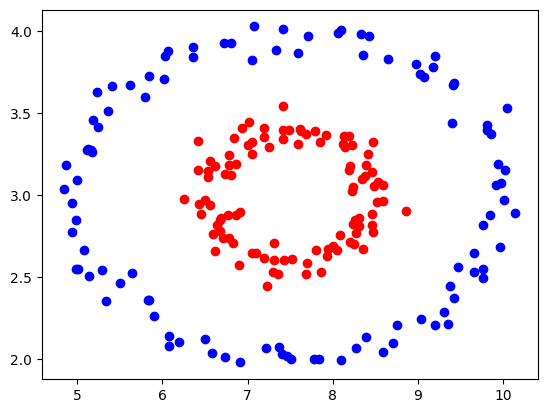

In [ ]:
import matplotlib.pyplot as plt

x1 = x[:, 0]
x2 = x[:, 1]

plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red')
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyModel(nn.Module):
  def __init__(self, num_input):
    super().__init__()
    self.linear = nn.Linear(num_input, 1)

  def forward(self, x):
    output = self.linear(x)
    output = torch.sigmoid(output)
    return output.flatten()

  def train(self, x, y, num_iter=500, lr=0.1):
    opt = optim.SGD(self.parameters(), lr=lr)
    for i in range(num_iter):
      z = self(x)
      J = -y*torch.log(z) - (1-y)*torch.log(1-z)
      J = J.mean()
      if i % 20 == 0:
        print('iter: %d, J: %f' % (i, J.item()))
      J.backward()
      opt.step()
      opt.zero_grad()

  def evaluate(self, x, y):
    z = self(x)
    z = (z > 0.5).float()
    return (z == y).float().mean()

tmp = torch.rand(100, 4)
model = MyModel(4)
output = model(tmp)
print('output', output.shape)

output torch.Size([100])


In [ ]:
tx = torch.tensor(x, dtype=torch.float32)
ty = torch.tensor(y, dtype=torch.float32)

model1 = MyModel(2)
model1.train(tx, ty, num_iter=10000)

accurary = model1.evaluate(tx, ty)
print('accurary', accurary.item())

iter: 0, J: 1.599779
iter: 20, J: 0.693516
iter: 40, J: 0.693360
iter: 60, J: 0.693266
iter: 80, J: 0.693208
iter: 100, J: 0.693173
iter: 120, J: 0.693151
iter: 140, J: 0.693137
iter: 160, J: 0.693128
iter: 180, J: 0.693122
iter: 200, J: 0.693118
iter: 220, J: 0.693114
iter: 240, J: 0.693112
iter: 260, J: 0.693109
iter: 280, J: 0.693107
iter: 300, J: 0.693105
iter: 320, J: 0.693104
iter: 340, J: 0.693102
iter: 360, J: 0.693100
iter: 380, J: 0.693099
iter: 400, J: 0.693097
iter: 420, J: 0.693096
iter: 440, J: 0.693094
iter: 460, J: 0.693093
iter: 480, J: 0.693091
iter: 500, J: 0.693090
iter: 520, J: 0.693088
iter: 540, J: 0.693087
iter: 560, J: 0.693085
iter: 580, J: 0.693084
iter: 600, J: 0.693083
iter: 620, J: 0.693081
iter: 640, J: 0.693080
iter: 660, J: 0.693079
iter: 680, J: 0.693078
iter: 700, J: 0.693076
iter: 720, J: 0.693075
iter: 740, J: 0.693074
iter: 760, J: 0.693073
iter: 780, J: 0.693072
iter: 800, J: 0.693070
iter: 820, J: 0.693069
iter: 840, J: 0.693068
iter: 860, J: 0.6

In [ ]:
def feature_scaling(x):
  mu = np.mean(x, axis=0) #np(n)
  x = (x-mu)/(np.max(x, axis=0)-np.min(x, axis=0))
  return x

x1 = x[:, 0]
x2 = x[:, 1]
x3 = np.square(x1)
x4 = np.square(x2)
new_x = np.concatenate((x, x3.reshape(-1, 1), x4.reshape(-1, 1)), axis=1) #np(m, 4)
new_x = feature_scaling(new_x)

tx_new = torch.tensor(new_x, dtype=torch.float32)

model2 = MyModel(4)
model2.train(tx_new, ty, lr=1, num_iter=2000)

accurary = model2.evaluate(tx_new, ty)
print('accurary', accurary.item())

iter: 0, J: 0.731423
iter: 20, J: 0.695305
iter: 40, J: 0.692515
iter: 60, J: 0.690755
iter: 80, J: 0.689270
iter: 100, J: 0.687861
iter: 120, J: 0.686475
iter: 140, J: 0.685097
iter: 160, J: 0.683725
iter: 180, J: 0.682357
iter: 200, J: 0.680994
iter: 220, J: 0.679634
iter: 240, J: 0.678278
iter: 260, J: 0.676926
iter: 280, J: 0.675578
iter: 300, J: 0.674234
iter: 320, J: 0.672894
iter: 340, J: 0.671558
iter: 360, J: 0.670226
iter: 380, J: 0.668897
iter: 400, J: 0.667572
iter: 420, J: 0.666252
iter: 440, J: 0.664935
iter: 460, J: 0.663622
iter: 480, J: 0.662312
iter: 500, J: 0.661007
iter: 520, J: 0.659705
iter: 540, J: 0.658407
iter: 560, J: 0.657113
iter: 580, J: 0.655822
iter: 600, J: 0.654536
iter: 620, J: 0.653253
iter: 640, J: 0.651973
iter: 660, J: 0.650698
iter: 680, J: 0.649426
iter: 700, J: 0.648158
iter: 720, J: 0.646893
iter: 740, J: 0.645632
iter: 760, J: 0.644375
iter: 780, J: 0.643121
iter: 800, J: 0.641871
iter: 820, J: 0.640625
iter: 840, J: 0.639382
iter: 860, J: 0.6